In [127]:
# plots atrophy output from SIR simulator

import pandas as pd
import nibabel as nib
import nilearn.plotting

# from bokeh.plotting import figure, show, output_notebook
# from bokeh.models import CustomJS, Slider, ColumnDataSource
# from bokeh.layouts import row

sim_atrophy = pd.read_csv('../data_gc/sim_atrophy_A1BG.csv', header=None)
emp_atrophy = pd.read_csv('../data_gc/dk_roi_gmv.csv')
reorder = pd.read_csv('./yqz_to_dk_order.csv', header=None)

In [114]:
atlas_img = nib.load('../data_gc/desikan_killiany_1.5mm.nii.gz')
# determine atlas shape
x, y, z = atlas_img.shape
atlas_data = atlas_img.get_fdata()

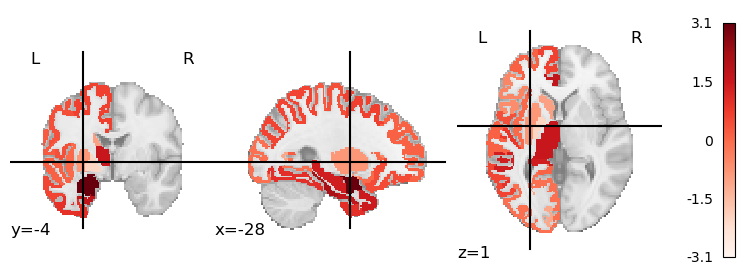

In [154]:
emp_atrophy_data = np.zeros((x,y,z))
# adjust data
for i in range (0, x):
    for j in range (0, y):
        for k in range (0, z):
            roi = atlas_data[i][j][k]
            emp_vox_atrophy = 0
            # LH only
            # set atrophy to atrophy of roi at t = 20000
            if roi > 0 and roi < 42:
                # vox_atrophy = dk_atrophy_df[2000][roi-1]
                emp_vox_atrophy = emp_atrophy[" Median Gray Value"][roi-1]
                # print (i, j, k)
            emp_atrophy_data[i][j][k] = emp_vox_atrophy

# # set datatype in header (float32)
emp_atrophy_header = atlas_img.header.copy()
emp_atrophy_header['datatype'] = 16
emp_atrophy_affine = atlas_img.affine.copy()

emp_atrophy_img = nib.nifti1.Nifti1Image(emp_atrophy_data, emp_atrophy_affine, header=emp_atrophy_header)
nilearn.plotting.plot_stat_map(emp_atrophy_img, cmap = 'Reds')

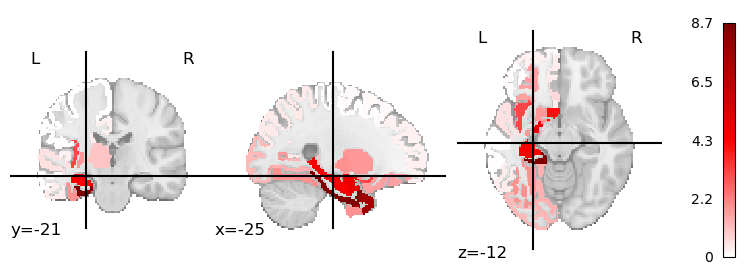

In [119]:
# really janky and suboptimal, but it does the thing

sim_atrophy_data = np.zeros((x,y,z))
# adjust data
for i in range (0, x):
    for j in range (0, y):
        for k in range (0, z):
            roi = atlas_data[i][j][k]
            sim_vox_atrophy = 0
            # LH only
            # set atrophy to atrophy of roi at t = 20000
            if roi > 0 and roi < 42:
                # vox_atrophy = dk_atrophy_df[2000][roi-1]
                sim_vox_atrophy = sim_atrophy[2000][roi-1]
                # print (i, j, k)
            sim_atrophy_data[i][j][k] = sim_vox_atrophy

# # set datatype in header (float32)
sim_atrophy_header = atlas_img.header.copy()
sim_atrophy_header['datatype'] = 16
sim_atrophy_affine = atlas_img.affine.copy()

sim_atrophy_img = nib.nifti1.Nifti1Image(sim_atrophy_data, sim_atrophy_affine, header=sim_atrophy_header)
nilearn.plotting.plot_stat_map(sim_atrophy_img, cmap = 'seismic')

In [110]:
# HAVING REORDERED ROIs IN MATLAB WE DO NOT NEED THIS MODULE

# NOTE: reordering YQZ values is hella munted. Basically the reorderth number of yqz roi will match the nth DK standard roi
# e.g. 1st line of reorder is 31. Therefore the 31st YQZ ROI (1161) matches the 1st DK atlas ROI (1181)


# dk_atrophy = {}
# for i in reorder[0].values:
#     dk_atrophy[i] = atrophy.iloc[i-1]
    # print (i, atrophy.iloc[i-1][19999])

# dk_atrophy_df = pd.DataFrame.from_dict(dk_atrophy, orient='index')
# dk_atrophy_df = dk_atrophy_df.reset_index(drop=True)
# dk_atrophy_df = dk_atrophy_df.sort_index()

# print (dk_atrophy_df[19999])
# print (atrophy[19999])